# Simple Linear Regression

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Loading the dataset

In [2]:
dataset = pd.read_csv('data/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Describing the dataset

In [4]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Matrix of features and labels

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (30, 1)
y (30,)


## Splitting the dataset into the training set and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

print(f"X_train {X_train.shape}")
print(f"X_test  {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test  {y_test.shape}")

X_train (20, 1)
X_test  (10, 1)
y_train (20,)
y_test  (10,)


## Training the Simple Linear Regression model

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the test set

In [8]:
y_pred = regressor.predict(X_test)
pd.options.display.precision = 1
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,37731.0,40835.1
1,122391.0,123079.4
2,57081.0,65134.6
3,63218.0,63265.4
4,116969.0,115602.6
5,109431.0,108125.9
6,112635.0,116537.2
7,55794.0,64200.0
8,83088.0,76349.7
9,101302.0,100649.1


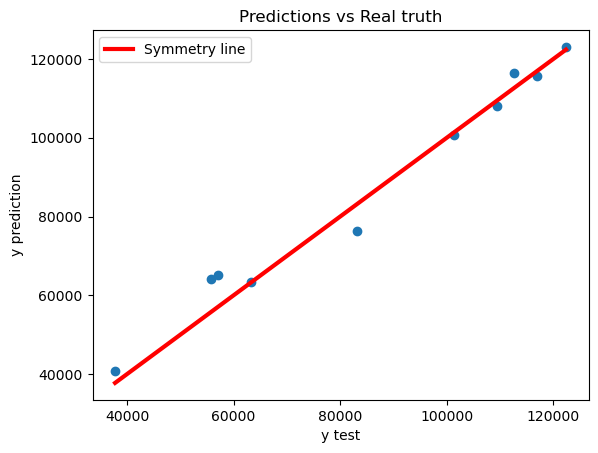

In [9]:
symmetry_line = [y_test.min(), y_test.max()]

plt.scatter(x=y_test, y=y_pred)
plt.plot(symmetry_line, symmetry_line, color="red", linewidth=3, label="Symmetry line")
plt.xlabel("y test")
plt.ylabel("y prediction")
plt.title("Predictions vs Real truth")
plt.legend()
plt.plot();

## Plotting the residuals

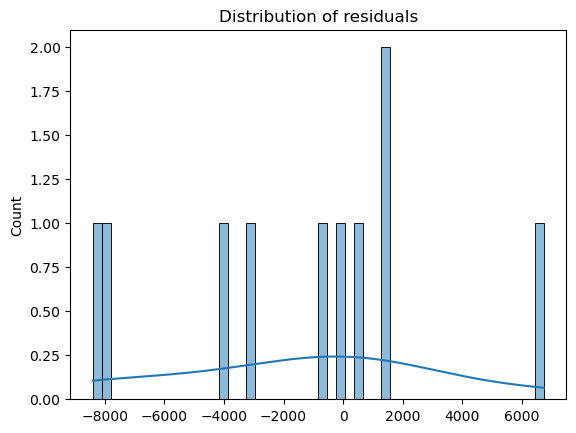

In [10]:
sns.histplot((y_test-y_pred), bins=50, kde=True)
plt.title("Distribution of residuals");

## Observing the coefficients

In [11]:
cdf = pd.DataFrame(
    regressor.coef_, dataset.columns[:-1], ["coefficients"]
    ).sort_values("coefficients", ascending=False)
cdf

,coefficients
YearsExperience,9345.9


## Visualising the Training set results

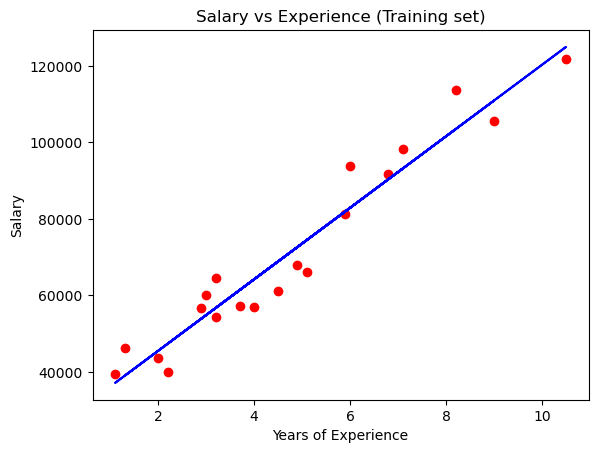

In [12]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

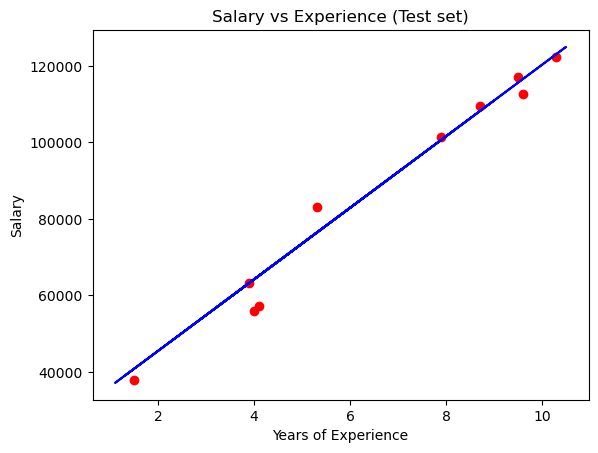

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Evaluating the model

In [14]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"The R2 score of the model: {r2:.3f}")

The R2 score of the model: 0.975
